# 모집단, 표본, 확률변수

**기본 설정**

Numpy와 Pandas 라이브러리를 각각 np와 pd로 불러온다.

In [1]:
import numpy as np
import pandas as pd

데이터프레임의 [chained indexing을 금지시키기 위한 설정](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)을 지정한다.
Pandas 3.0 버전부터는 기본 옵션으로 지정된다.

In [2]:
pd.options.mode.copy_on_write = True

주피터 노트북에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.
아래 코드는 주피터 노트북에서만 사용하며 일반적인 파이썬 코드가 아니다.

In [3]:
%precision 6

'%.6f'

아래 코드는 데이터프레임 내에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.

In [4]:
pd.set_option('display.precision', 6)

데이터 시각화를 위해 `matplotlib.pyplot`를 `plt`라는 별칭으로 불러온다.

In [5]:
import matplotlib.pyplot as plt

**데이터 저장소 디렉토리**

코드에 사용되는 [데이터 저장소의 기본 디렉토리](https://github.com/codingalzi/DataSci/tree/master/data)를 지정한다.

In [6]:
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'

**주요 내용**

구할 수 있는 또는 구해진 몇 개의 데이터만을 이용하여
전체 데이터에 대한 통계적 성질을 추측하는 추측통계의 기본 개념을 소개한다.

- 모집단
- 표본
- 표본추출
- 확률분포
- 확률변수

## 모집단과 표본

<p><div align="center"><img src="https://github.com/codingalzi/DataSci/blob/master/jupyter-book/images/figures_subplots.png?raw=true" style="width:600px"></div></p>

In [124]:
housing = pd.read_csv(data_url+"california_housing.csv")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [125]:
housing = housing.loc[:, ['median_income', 'median_house_value']].copy()

In [126]:
housing

,median_income,median_house_value
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
...,...,...
20635,1.5603,78100.0
20636,2.5568,77100.0
20637,1.7000,92300.0
20638,1.8672,84700.0


<Axes: xlabel='median_income', ylabel='median_house_value'>

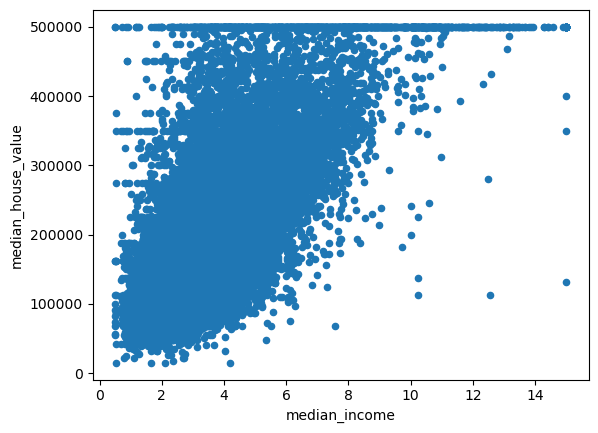

In [127]:
housing.plot.scatter('median_income', 'median_house_value')

In [128]:
housing.describe()

,median_income,median_house_value
count,20640.000000,20640.000000
mean,3.870671,206855.816909
std,1.899822,115395.615874
min,0.499900,14999.000000
25%,2.563400,119600.000000
50%,3.534800,179700.000000
75%,4.743250,264725.000000
max,15.000100,500001.000000


**마스크와 부울 인덱싱**

In [129]:
house_value_max = housing['median_house_value'].max()
house_value_max

500001.000000

In [130]:
mask = housing['median_house_value'] == house_value_max
mask

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: median_house_value, Length: 20640, dtype: bool

In [131]:
mask.sum()

965

In [132]:
housing_ = housing[~mask]

In [133]:
housing_.shape

(19675, 2)

<Axes: xlabel='median_income', ylabel='median_house_value'>

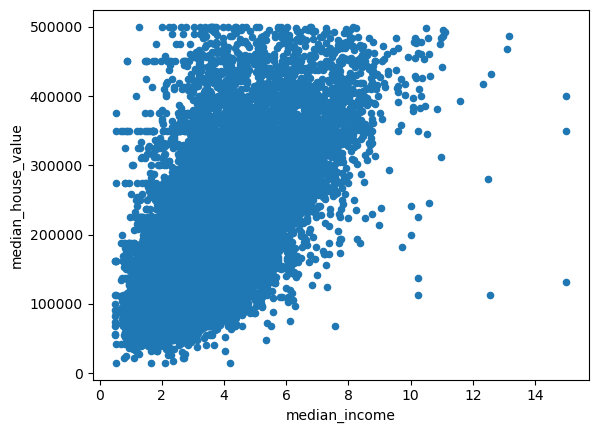

In [134]:
housing_.plot.scatter('median_income', 'median_house_value')

In [135]:
housing = housing_.copy()

## 계층 샘플링

In [136]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [137]:
housing

,median_income,median_house_value,income_cat
0,8.3252,452600.0,5
1,8.3014,358500.0,5
2,7.2574,352100.0,5
3,5.6431,341300.0,4
4,3.8462,342200.0,3
...,...,...,...
20635,1.5603,78100.0,2
20636,2.5568,77100.0,2
20637,1.7000,92300.0,2
20638,1.8672,84700.0,2


Text(0, 0.5, 'Number of districts')

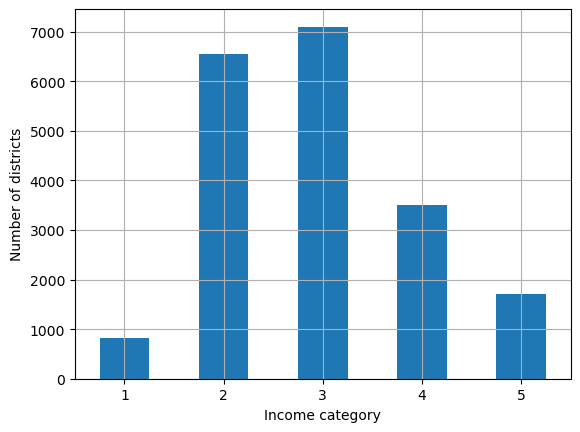

In [138]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")

In [139]:
stratification = housing.groupby('income_cat', observed=True, group_keys=True)

In [140]:
stratified_count = stratification.count()
stratified_count

,median_income,median_house_value
income_cat,,
1,814,814
2,6552,6552
3,7103,7103
4,3502,3502
5,1704,1704


**무작위 샘플링**

In [141]:
random_sampling = housing.sample(frac=0.1, random_state=1234)
random_sampling

,median_income,median_house_value,income_cat
15905,1.9464,249000.0,2
13,2.6736,191300.0,2
12259,1.8845,77700.0,2
13028,3.0533,112100.0,3
17185,4.8405,354300.0,4
...,...,...,...
14830,2.0213,110600.0,2
18112,5.4842,335300.0,4
15836,4.2667,338800.0,3
6027,2.8983,129200.0,2


Text(0, 0.5, 'Number of districts')

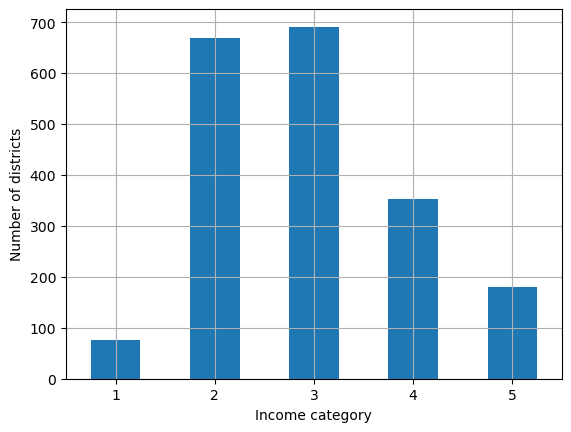

In [142]:
random_sampling["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")

In [143]:
random_sampling_count = random_sampling.groupby('income_cat', observed=True).count()
random_sampling_count

,median_income,median_house_value
income_cat,,
1,76,76
2,668,668
3,691,691
4,353,353
5,180,180


**계층 샘플링**

In [144]:
stratified_sampling = stratification.apply(lambda y:y.sample(frac=0.1, random_state=1234), include_groups=False)
stratified_sampling

median_income  median_house_value
income_cat                                         
1          15062         1.3291            120800.0
           17524         0.7068            200000.0
           5177          1.0375             89800.0
           8373          1.2094            157500.0
           5225          0.9889             87500.0
...                         ...                 ...
5          18255         6.2884            414700.0
           10317        10.1299            454300.0
           1511          7.6877            367700.0
           12369         6.1437            232100.0
           10524         6.9343            298500.0

[1966 rows x 2 columns]

In [145]:
stratified_sampling_count = stratified_sampling.groupby(level=0, observed=False).count()
stratified_sampling_count

,median_income,median_house_value
income_cat,,
1,81,81
2,655,655
3,710,710
4,350,350
5,170,170


In [146]:
stratified_sampling_count.sum()

median_income         1966
median_house_value    1966
dtype: int64

**샘플링 결과 비교**

In [147]:
random_total = random_sampling_count.sum()
random_total

median_income         1968
median_house_value    1968
dtype: int64

In [148]:
stratified_total = stratified_sampling_count.sum()
stratified_total

median_income         1966
median_house_value    1966
dtype: int64

In [149]:
random_sampling_ratio = random_sampling_count / random_total
random_sampling_ratio

,median_income,median_house_value
income_cat,,
1,0.038618,0.038618
2,0.339431,0.339431
3,0.351118,0.351118
4,0.179370,0.179370
5,0.091463,0.091463


In [150]:
stratified_sampling_ratio = stratified_sampling_count / stratified_total
stratified_sampling_ratio

,median_income,median_house_value
income_cat,,
1,0.041200,0.041200
2,0.333164,0.333164
3,0.361139,0.361139
4,0.178026,0.178026
5,0.086470,0.086470


In [151]:
stratified_ratio = stratified_count/(housing.shape)[0]
stratified_ratio

,median_income,median_house_value
income_cat,,
1,0.041372,0.041372
2,0.333011,0.333011
3,0.361017,0.361017
4,0.177992,0.177992
5,0.086607,0.086607


In [152]:
proportions = pd.concat([stratified_ratio.iloc[:, [1]], 
                         stratified_sampling_ratio.iloc[:, [1]],
                         random_sampling_ratio.iloc[:, [1]]],
                        axis=1)

proportions.columns = ['전체(%)', '계층 샘플링(%)', '무작위 샘플링(%)']
proportions.index.name = '소득 구간'
proportions

,전체(%),계층 샘플링(%),무작위 샘플링(%)
소득 구간,,,
1,0.041372,0.041200,0.038618
2,0.333011,0.333164,0.339431
3,0.361017,0.361139,0.351118
4,0.177992,0.178026,0.179370
5,0.086607,0.086470,0.091463


In [153]:
proportions["계층 샘플링 오류율(%)"] = (proportions["계층 샘플링(%)"] / proportions["전체(%)"] - 1)
proportions["무작위 샘플링 오류율(%)"] = (proportions["무작위 샘플링(%)"] / proportions["전체(%)"] - 1)

In [154]:
proportions

,전체(%),계층 샘플링(%),무작위 샘플링(%),계층 샘플링 오류율(%),무작위 샘플링 오류율(%)
소득 구간,,,,,
1,0.041372,0.041200,0.038618,-0.004155,-0.066576
2,0.333011,0.333164,0.339431,0.000457,0.019277
3,0.361017,0.361139,0.351118,0.000340,-0.027419
4,0.177992,0.178026,0.179370,0.000191,0.007739
5,0.086607,0.086470,0.091463,-0.001586,0.056070


In [155]:
proportions = (proportions *100).round(2)
proportions

,전체(%),계층 샘플링(%),무작위 샘플링(%),계층 샘플링 오류율(%),무작위 샘플링 오류율(%)
소득 구간,,,,,
1,4.14,4.12,3.86,-0.42,-6.66
2,33.30,33.32,33.94,0.05,1.93
3,36.10,36.11,35.11,0.03,-2.74
4,17.80,17.80,17.94,0.02,0.77
5,8.66,8.65,9.15,-0.16,5.61


**계층 샘플링 데이터만 활용**

In [156]:
stratified_sampling = stratified_sampling.reset_index(level=0, drop=True).sort_index()

In [157]:
stratified_sampling

,median_income,median_house_value
11,3.2705,241800.0
27,1.8080,105500.0
32,1.7969,110400.0
47,1.7348,137500.0
48,0.9506,187500.0
...,...,...
20589,1.6652,58900.0
20600,3.1029,71700.0
20610,1.3631,45500.0
20622,2.4167,67000.0


In [158]:
stratified_sampling.reset_index(drop=True, inplace=True)

In [159]:
stratified_sampling

,median_income,median_house_value
0,3.2705,241800.0
1,1.8080,105500.0
2,1.7969,110400.0
3,1.7348,137500.0
4,0.9506,187500.0
...,...,...
1961,1.6652,58900.0
1962,3.1029,71700.0
1963,1.3631,45500.0
1964,2.4167,67000.0


<Axes: xlabel='median_income', ylabel='median_house_value'>

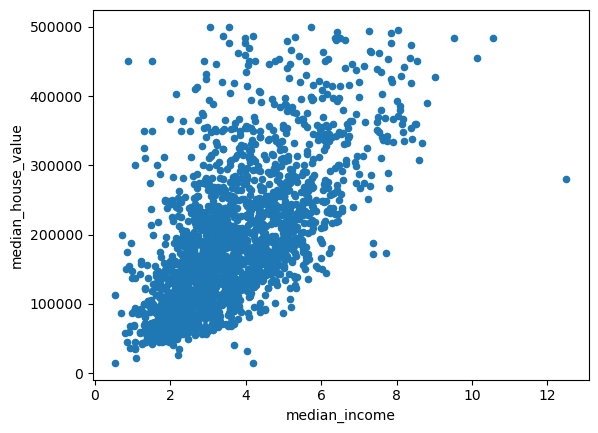

In [160]:
stratified_sampling.plot.scatter('median_income', 'median_house_value')

## 표본 평균의 분포

In [9]:
for i in range(5):
    sample = np.random.choice(scores, 20)
    print(f'{i+1}번째 무작위 추출로 얻은 표본평균', sample.mean())

1번째 무작위 추출로 얻은 표본평균 72.45
2번째 무작위 추출로 얻은 표본평균 63.7
3번째 무작위 추출로 얻은 표본평균 66.05
4번째 무작위 추출로 얻은 표본평균 71.7
5번째 무작위 추출로 얻은 표본평균 74.15


## 확률 모델

### 확률분포

In [11]:
dice = [1, 2, 3, 4, 5, 6]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]

In [13]:
np.random.choice(dice, p=prob)

4

In [14]:
num_trial = 100
sample = np.random.choice(dice, num_trial, p=prob)
sample

array([6, 6, 5, 5, 6, 5, 2, 5, 6, 3, 5, 6, 6, 6, 5, 3, 3, 3, 5, 4, 6, 5,
       2, 2, 5, 6, 6, 5, 5, 6, 6, 5, 5, 5, 6, 4, 4, 6, 2, 3, 6, 6, 5, 4,
       5, 1, 4, 4, 6, 5, 4, 5, 6, 3, 6, 4, 6, 4, 5, 3, 6, 5, 3, 3, 6, 6,
       5, 3, 3, 5, 4, 6, 3, 3, 2, 6, 1, 6, 2, 3, 6, 6, 1, 3, 4, 5, 2, 5,
       1, 6, 6, 5, 3, 5, 5, 6, 5, 3, 4, 6])

In [16]:
freq, _ = np.histogram(sample, bins=6, range=(1, 7))
pd.DataFrame({'frequency':freq,
              'relative frequency':freq / num_trial},
              index = pd.Index(np.arange(1, 7), name='dice'))

,frequency,relative frequency
dice,,
1,4,0.04
2,7,0.07
3,17,0.17
4,12,0.12
5,28,0.28
6,32,0.32


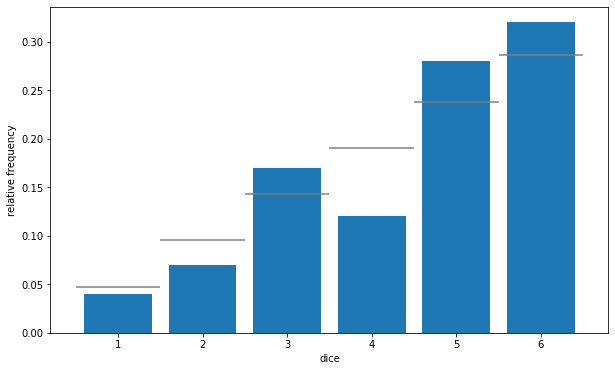

In [17]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
# 실제의 확률분포를 가로선으로 표시
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
# 막대 그래프의 [1.5, 2.5, ..., 6.5]에 눈금을 표시
ax.set_xticks(np.linspace(1.5, 6.5, 6))
# 주사위 눈의 값은 [1, 2, 3, 4, 5, 6]
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

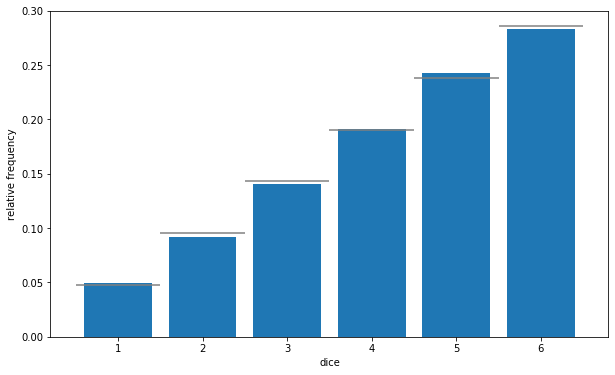

In [18]:
num_trial = 10000
sample = np.random.choice(dice, size=num_trial, p=prob)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
ax.set_xticks(np.linspace(1.5, 6.5, 6))
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

## 추측통계에서의 확률

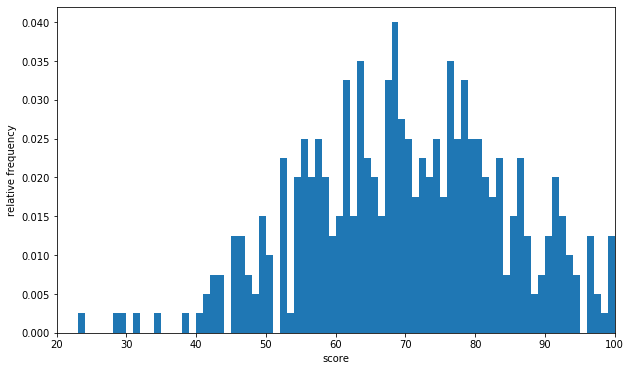

In [19]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

In [20]:
np.random.choice(scores)

63

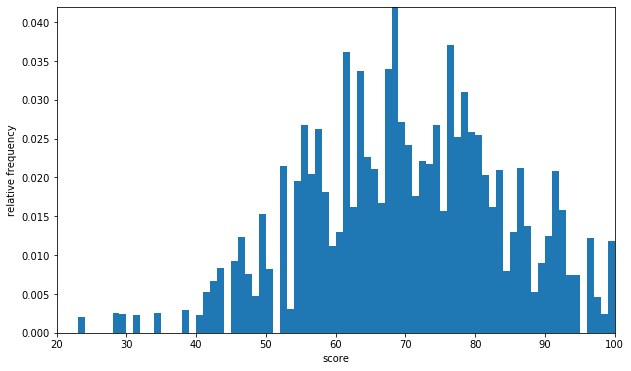

In [21]:
sample = np.random.choice(scores, 10000)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

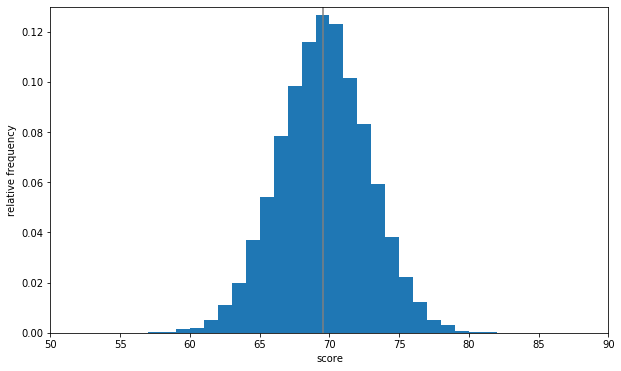

In [22]:
sample_means = [np.random.choice(scores, 20).mean()
                for _ in range(10000)]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0, 100), density=True)
# 모평균을 세로선으로 표시
ax.vlines(np.mean(scores), 0, 1, 'gray')
ax.set_xlim(50, 90)
ax.set_ylim(0, 0.13)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()